# Finding latent dimensions for the toroidal mirror 

It is common that beamline inputs are highly coupled, and so the effect of an input on the beam cannot be understood except in concert with the others. In this example, we show how our agent figures out latent dimensions, as well as the benefit of doing so. 

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

In [2]:
import bloptools
from bloptools.experiments.sirepo.tes import w8_digestion

dofs = [
    {"device": toroid.x_rot, "limits": (-0.001, 0.001), "kind": "active"},
    {"device": toroid.offz, "limits": (-0.5, 0.5), "kind": "active"},
]

tasks = [{"key": "flux", "kind": "maximize", "transform": "log"}]

agent = bloptools.bayesian.Agent(
    dofs=dofs,
    tasks=tasks,
    dets=[w8],
    digestion=w8_digestion,
    db=db,
)

RE(agent.initialize("qr", n_init=24))

New stream: 'primary'
+-----------+------------+--------------+-------------+------------+
|   seq_num |       time | toroid_x_rot | toroid_offz |    w8_flux |
+-----------+------------+--------------+-------------+------------+


|         1 | 05:55:38.9 |        0.001 |       0.313 |   2410.364 |


|         2 | 05:55:44.2 |       -0.001 |      -0.039 |      0.000 |


|         3 | 05:55:49.5 |       -0.000 |       0.087 |      0.000 |


|         4 | 05:55:54.9 |        0.000 |      -0.299 |    736.799 |


|         5 | 05:56:00.2 |        0.000 |       0.204 |    609.610 |


|         6 | 05:56:05.6 |       -0.000 |      -0.431 |   1572.298 |


|         7 | 05:56:10.9 |       -0.001 |       0.446 |      0.000 |


|         8 | 05:56:16.3 |        0.001 |      -0.157 |    966.041 |


|         9 | 05:56:21.6 |        0.001 |       0.037 |   1979.871 |


|        10 | 05:56:27.0 |       -0.001 |      -0.326 |   5352.794 |


|        11 | 05:56:32.4 |       -0.000 |       0.309 |      0.000 |


|        12 | 05:56:37.7 |        0.000 |      -0.083 |   2944.347 |


|        13 | 05:56:43.1 |        0.000 |       0.426 |      4.468 |


|        14 | 05:56:48.4 |       -0.000 |      -0.215 |   5451.509 |


|        15 | 05:56:53.7 |       -0.001 |       0.170 |      0.000 |


|        16 | 05:56:59.1 |        0.001 |      -0.443 |      0.000 |


|        17 | 05:57:04.4 |        0.001 |       0.140 |   1840.137 |


|        18 | 05:57:09.8 |       -0.001 |      -0.476 |   1675.243 |


|        19 | 05:57:15.1 |       -0.000 |       0.397 |      0.000 |


|        20 | 05:57:20.4 |        0.000 |      -0.249 |    865.844 |


|        21 | 05:57:25.7 |        0.000 |       0.280 |      0.000 |


|        22 | 05:57:31.1 |       -0.000 |      -0.116 |   5532.829 |


|        23 | 05:57:36.4 |       -0.001 |       0.007 |      0.000 |


|        24 | 05:57:41.7 |        0.001 |      -0.359 |      0.000 |
+-----------+------------+--------------+-------------+------------+
generator list_scan ['89f22ff0'] (scan num: 1)


('89f22ff0-b1d1-43a3-a82a-ffb8df5d9194',)

We can see that the beam is only not cut off (i.e. it has a non-zero flux) in a diagonal strip, and that in fact this is really just a one-dimensional optimization problem in some diagonal dimension. Our agent has figured this out, with a transformation matrix that has a long coherence length in one dimension and a short coherence length orthogonal to it:

In [3]:
agent.tasks[0]["model"].covar_module.latent_transform

tensor([[[ 0.0150,  0.0165],
         [-6.0430,  5.4976]]], dtype=torch.float64,
       grad_fn=<UnsafeViewBackward0>)

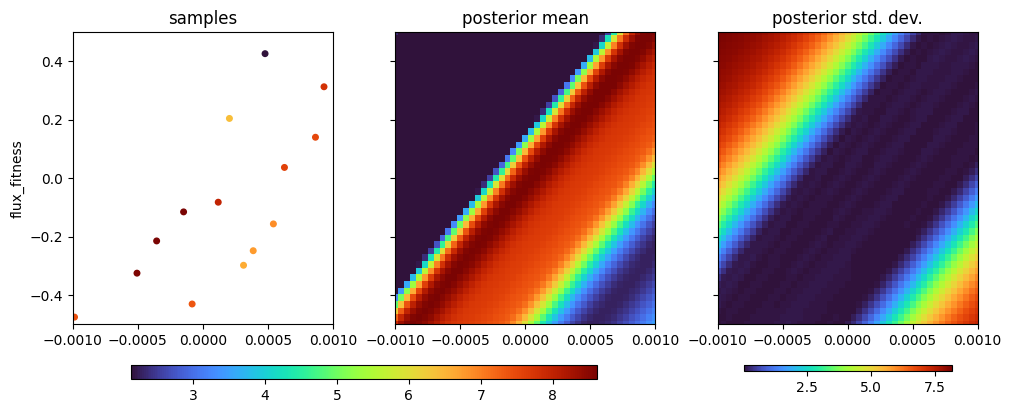

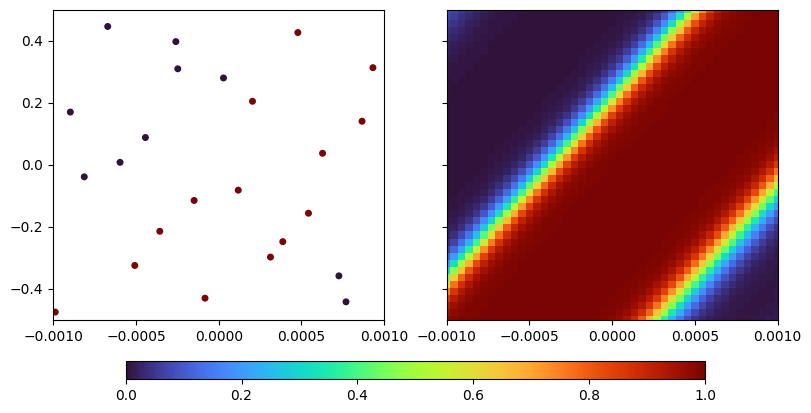

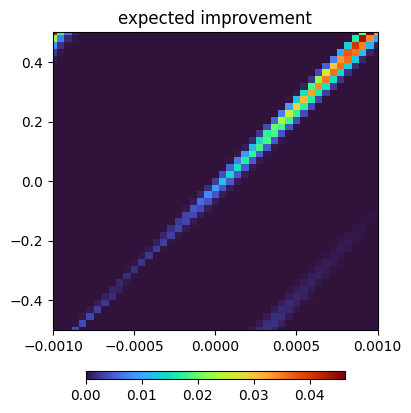

In [4]:
agent.plot_tasks()
agent.plot_feasibility()
agent.plot_acquisition(strategy=["ei", "pi", "ucb"])